In [1]:
from transformers import AutoModel, AutoTokenizer
from transformers import WEIGHTS_NAME, CONFIG_NAME
import torch
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
from collections import Counter
import re
import random

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
phobert = AutoModel.from_pretrained("vinai/phobert-base")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.decoder.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [2]:
df = pd.read_csv('processed_test.csv')

In [3]:
df.length()

AttributeError: 'DataFrame' object has no attribute 'length'

In [26]:
genre_counts = df['genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

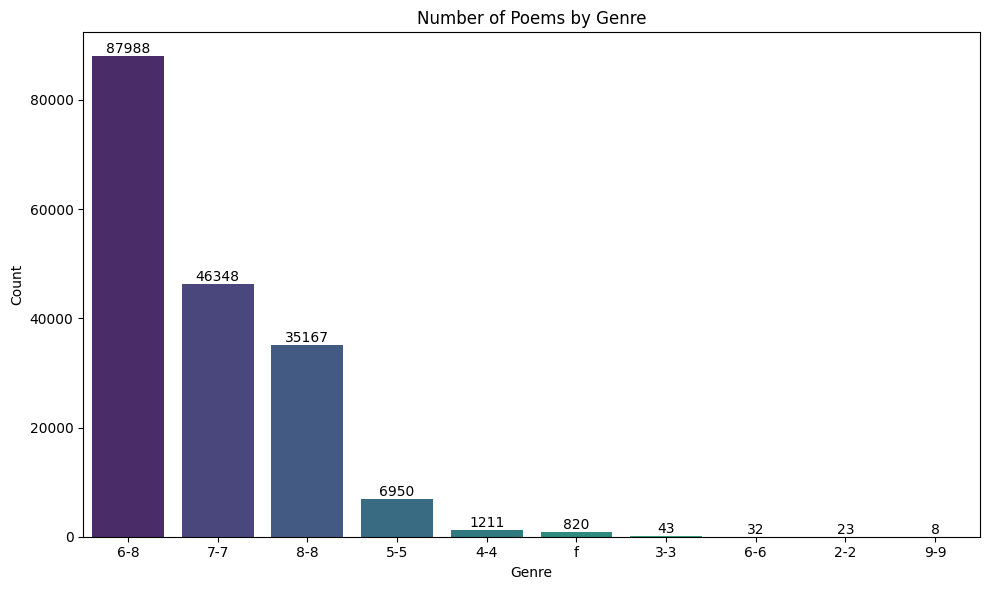

In [27]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Genre', y='Count', data=genre_counts, palette='viridis')

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Number of Poems by Genre')

for index, value in enumerate(genre_counts['Count']):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

plt.xticks()
plt.tight_layout() 
plt.show()

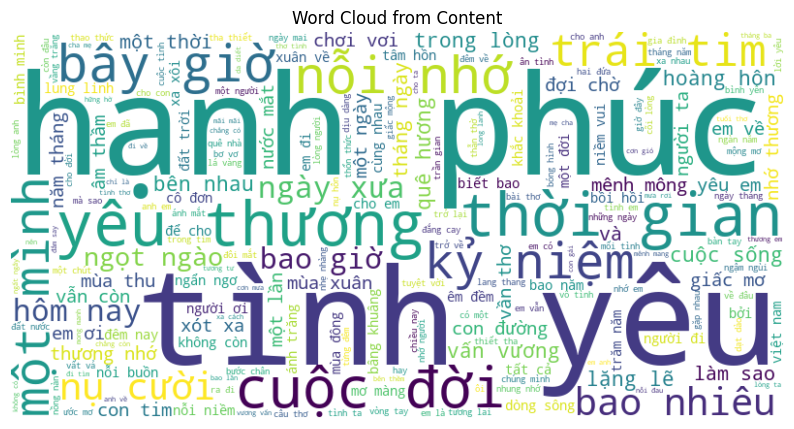

In [66]:
text = " ".join(review for review in df.content)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Word Cloud from Content')
plt.show()

In [6]:
import re
import csv

def normalize_text(text):
    text = text.lower()
    text = text.strip() 
    text = re.sub(r'  ', '', text)
    text = re.sub(r'\.{3,}', '', text)
    text = re.sub(r' - ', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'\u00a0', ' ', text) 
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'([1-9])\n', r'\1', text)
    text = re.sub(r'\n\n', '\n', text)
    # text = '\n'.join(['<start> ' + line + ' <end>' for line in text.split('\n') if line != ''])
    return text

def process_data(path_input, path_out):
    processed_lines = [] 
    with open(path_input, 'r', encoding='utf-8') as f_in, open(path_out, 'w', encoding='utf-8', newline='') as f_out:
        csv_reader = csv.reader(f_in)
        csv_writer = csv.writer(f_out)
        
        for row in csv_reader:
            if len(row) > 1:
                row[1] = normalize_text(row[1])
            processed_lines.append(row)
        
        csv_writer.writerows(processed_lines)

process_data(path_input='test.csv', path_out='processed_test.csv')

In [29]:
poems = df['content'].tolist()

for i in range(len(poems)):
    poems[i] = poems[i] + '<|endoftext|>'

print(poems[0])

ngày đông se sắt lạnh trong lòng
có việc đi ngang qua chỗ đó
bắt gặp ánh mắt ai say đắm
nụ cười ai khiến tôi hoảng loạn
ngày hôm nay tôi lướt qua ai
thấy tim mình xốn xang loạn nhịp
sao thế có phải mình say nắng
chiều đông đâu có nắng mà say
say ngất say ngây say không tỉnh
lâng lâng như uống phải men tình
thả hồn theo gió lộng mênh mông
mộng mơ bồng bềnh khi sương xuống
mây chiều đã nhuộm đỏ hoàng hôn
chim khôn đã cùng nhau về tổ
ngất ngây đắm chìm say gì thế
mà đứng chôn chân chả muốn về
sương nhẹ rơi vương đầy trên cỏ
sao lòng buồn bỗng thấy bâng khuâng
giật mình chợt tỉnh cơn mộng mị
tỉnh lại đi tôi ơi tỉnh lại
còn các con đang ngóng chờ cửa
còn bạn đời đang đợi tôi về<|endoftext|>


In [32]:
def find_stats(poem_data):
    n = len(poem_data)
    max_poem_len, max_tag_len = 0, 0
    poem_lengths, tags = np.zeros(n), set()
    for i in range(n):
        row = poem_data.iloc[i]
        poem = row['content'].split()
        
        ##Add length of each poem to the list to find median
        poem_len = len(poem)
        poem_lengths[i] = poem_len 
    
        ##Print stats
    print("Maximum Poem Length = ", poem_lengths[np.argmax(poem_lengths)])
    print("Median Poem Length = ", round(np.median(poem_lengths), 3))
    print("Average Poem Length = ", round(np.average(poem_lengths), 3))
    print("Number of Unique Tags = ", len(tags))
    print("Total Number of Poems = ", n)
    print("Number of Poems below 64 words = ", np.sum(poem_lengths<=64))

In [33]:
tags = find_stats(df)

print("Vocab Size = ", tokenizer.vocab_size+1)
tokenizer.add_special_tokens({'pad_token': '<PAD>'})
print("Pad Token = ", tokenizer.pad_token, ", Pad Token ID = ", tokenizer.pad_token_id)
print("EOS Token = ", tokenizer.eos_token, ", EOS Token ID = ", tokenizer.eos_token_id)

Maximum Poem Length =  13272.0
Median Poem Length =  98.0
Average Poem Length =  108.135
Number of Unique Tags =  0
Total Number of Poems =  178590
Number of Poems below 64 words =  58038
Vocab Size =  64001
Pad Token =  <PAD> , Pad Token ID =  64001
EOS Token =  </s> , EOS Token ID =  2


In [4]:
file_path = 'output.csv'  # Thay đổi đường dẫn tới tập dữ liệu của bạn
data = pd.read_csv(file_path)
data = data[~data['content'].str.contains("...") & 
            ~data['content'].str.contains(" - ") & 
            ~data['content'].str.contains("  ")]

# Lưu tập dữ liệu đã được xử lý (nếu cần)
data.to_csv('final.csv', index=False)
